In [1]:
# import the necessary packages
import geopandas as gpd
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2
import pandas as pd
from pyproj import Proj 
import os


In [2]:
#dataset= r'G:\drone\surveys\mangrouve_bay\survey1'
#d=r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\mangrouve_bay\survey1\mbay_20181012T085119_2089.jpg'

In [157]:
import glob  

files = glob.glob(r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\survey_12\*.jpg',recursive=True)



In [158]:
#filepath=glob.glob(r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\mangrouve_bay\s*\*.jpg' ,recursive=True)


# # compare Blue Green Red histogram
1 set the red value to 0
2 blur the image for the homogeneity 
3 treshold the image to have some patch with the mean of blue and green in each patch
4 resize the image 

In [159]:
def pixel_valu(item,makeplot=False):
    #print(item)
    valug = cv2.imread(item)
    if makeplot:
        plt.subplots()
        plt.imshow(valug[...,::-1])    
    valug[:,:,0]= valug[:,:,0] -valug[:,:,2]*0.9
    valugb=cv2.blur(valug,(200,200))
    ret,thresh1 = cv2.threshold(valugb[:,:,0],40,150,cv2.THRESH_BINARY)
    img = cv2.resize(thresh1, (5, 4), interpolation = cv2.INTER_AREA)
    
    x = np.arange(0,5)
    y = np.arange(0,4)
    xx, yy = np.meshgrid(x, y)
    xx =xx.reshape(1,20)
    yy =yy.reshape(1,20)
    img[yy,xx]
    output = np.dstack([xx,yy,img[yy,xx]])[0]
    output =pd.DataFrame.from_records(output,columns=['x','y','value'])
    output['file']=item
    return output


total = pd.concat([pixel_valu(file) for file in files])
total.head()
  

#pix=list(files.apply(pixel_loc))
#pix=pd.concat(pix)


,x,y,value,file
0,0,0,66,\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALO...
1,1,0,85,\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALO...
2,2,0,9,\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALO...
3,3,0,31,\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALO...
4,4,0,121,\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALO...


In [160]:
total.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\s12pix.csv')

# Plot the images

if you don' want to see the  image just skip

<IPython.core.display.Javascript object>


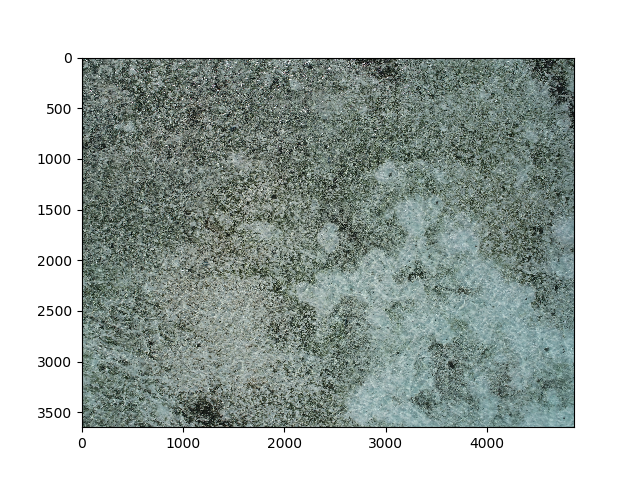

<IPython.core.display.Javascript object>


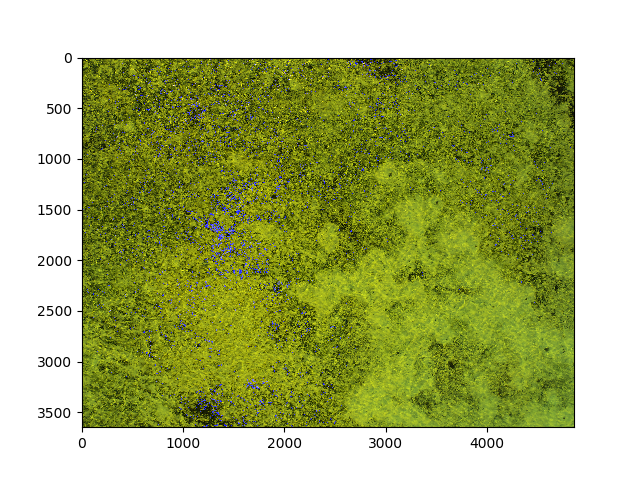

In [326]:
pixel_valu(files[0],True)
plt.subplots()
plt.imshow(valug[...,::-1])

In [ ]:
plt.subplots()
plt.imshow(img)

SyntaxError: invalid syntax (<ipython-input-151-ddf754805676>, line 3)

<IPython.core.display.Javascript object>


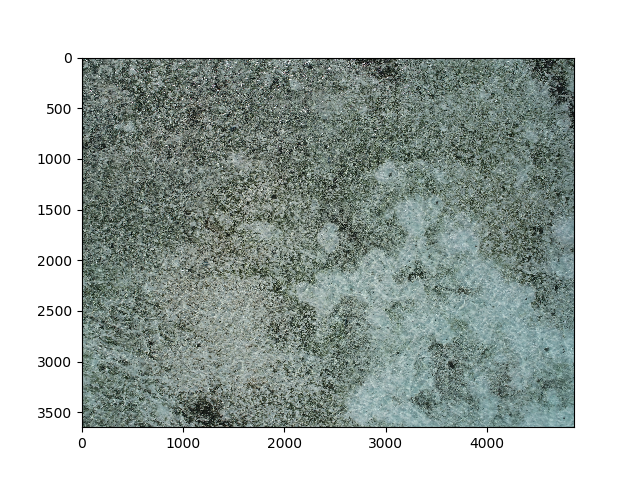

In [227]:
%matplotlib notebook
valu=cv2.imread(filepath)
plt.subplots()
plt.imshow(valu[...,::-1])

<IPython.core.display.Javascript object>


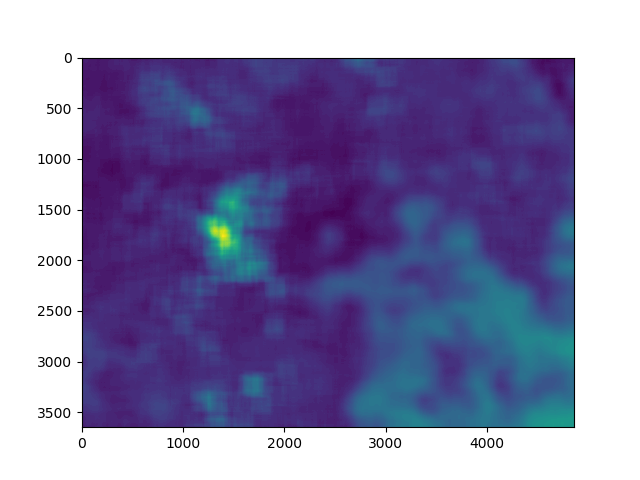

In [228]:
plt.subplots()
plt.imshow(valu[:,:,0]-valu[:,:,2]*0.9)


In [229]:

#%matplotlib notebook
plt.imshow(valugb[:,:,0])

<IPython.core.display.Javascript object>


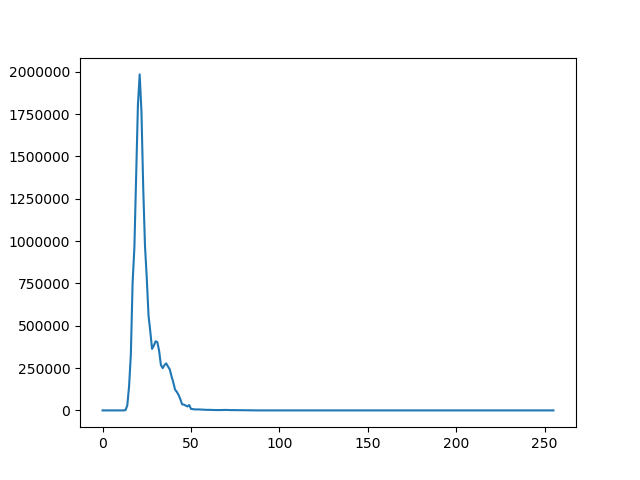

In [230]:
#valug= valu
valug[:,:,0]= im2[:,:,0] -im2[:,:,2]*0.9

#gray = cv2.cvtColor(image, cv2.CO)

valugb=cv2.blur(valug,(200,200))

histr = cv2.calcHist([valugb],[0],None,[256],[0,256])
plt.subplots()
plt.plot(histr)




In [238]:
ret,thresh1 = cv2.threshold(valugb[:,:,0],20,150,cv2.THRESH_BINARY)

<IPython.core.display.Javascript object>


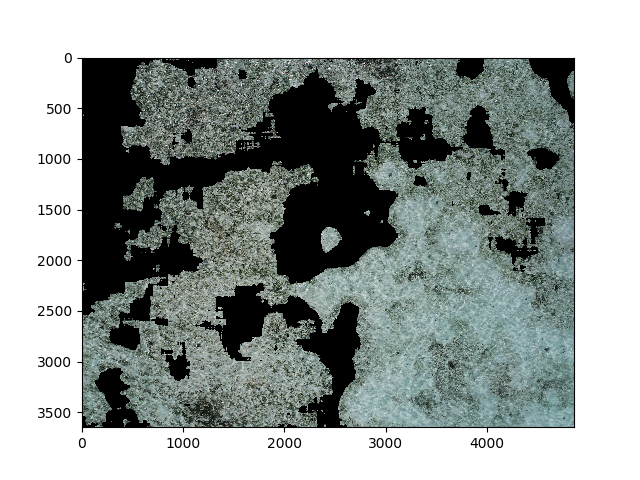

In [239]:
plt.subplots()
res = cv2.bitwise_and(valu,valu,mask = thresh1)
plt.imshow(res[...,::-1],'gray')

In [233]:
#resized_image = cv2.resize(thresh1, (5, 4)) 
resized_image = cv2.resize(thresh1, (5, 4),fy=1.0, interpolation=cv2.INTER_NEAREST)

In [188]:
img = cv2.resize(thresh1, (5, 4), interpolation = cv2.INTER_AREA)

In [189]:
thresh1

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 150, 150, 150],
       [  0,   0,   0, ..., 150, 150, 150],
       [  0,   0,   0, ..., 150, 150, 150]], dtype=uint8)

In [190]:
thresh1.shape[0]/5

729.6

<IPython.core.display.Javascript object>


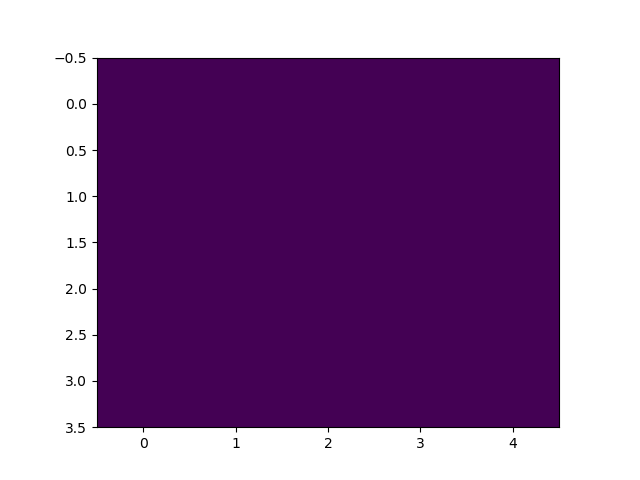

In [191]:
plt.subplots()
plt.imshow(resized_image)

<IPython.core.display.Javascript object>


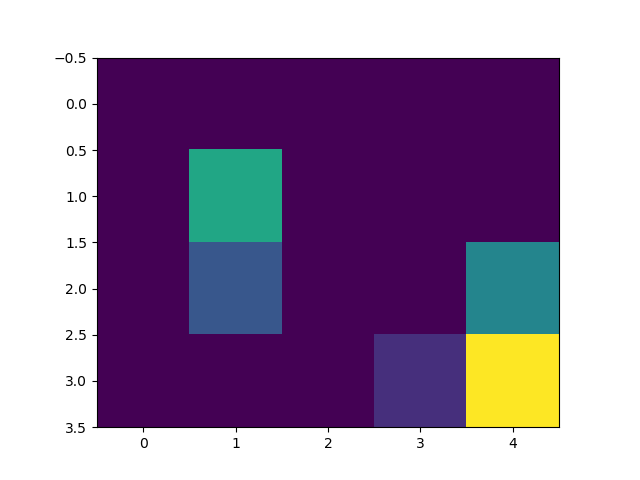

In [192]:
plt.subplots()
plt.imshow(img)

In [193]:
x = np.arange(0,5)
y = np.arange(0,4)
xx, yy = np.meshgrid(x, y)
xx =xx.reshape(1,20)
yy =yy.reshape(1,20)
img[yy,xx]
output = np.dstack([xx,yy,img[yy,xx]])[0]

In [194]:
list(zip(xx,yy,img[yy,xx]))

[(array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]),
  array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
  array([ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0, 12,  0,  0, 20,  0,  0,
          0,  6, 44], dtype=uint8))]

In [343]:
max(pix.x)

4

# #Load the image resize


In [161]:
pix= pd.read_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\s12pix.csv')

## replace the image in the real world coordinate 

convert the information of each pixel in UTM coordinate

In [162]:
surveys = pd.read_json("G:/drone/surveys/images.json")

In [163]:
def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)

surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]


In [164]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)


In [165]:
surveys['rads']=np.deg2rad(surveys.FlightYawDegree)

In [166]:

joint =pix.join(surveys,rsuffix='_sur')

In [167]:
#pix =pd.DataFrame.from_records(output,columns=['x','y','value'])
pix['yy']=456+pix.y*912
pix['xx']=364.5+pix.x*729

In [168]:
joint['dx']=((2432-pix.xx)/3666.666504)*joint.RelativeAltitude
joint['dy']=((1824-pix.yy)/3666.666504)*joint.RelativeAltitude

In [169]:
a =joint['dx'] * np.cos(surveys['rads']) +  joint['dy'] * np.sin(surveys['rads'])

In [170]:
joint['FileName']=joint.file.apply(os.path.basename)
joint.set_index('FileName',inplace=True)

In [171]:
joint['xxx'] = joint['dx'] * np.cos(joint['rads']) +  joint['dy'] * np.sin(joint['rads'])
joint['xxx'] = joint['easting'] + joint['xxx'] 
joint['yyy'] = -joint['dx'] * np.sin(joint['rads']) + joint['dy'] * np.cos(joint['rads'])
joint['yyy'] = joint['northing'] + joint['yyy'] 

In [172]:
joint.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\s12pix.csv')

In [173]:
kind =pd.DataFrame(joint,columns=['FileName','xxx','yyy','value'])
kind.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\kinds12pix.csv')